<div dir="rtl" style="background-color:#ffffff; color:#800080; 
     font-size:22px; font-weight:bold; padding:10px; border-radius:10px; text-align:center;">
📊  تحلیل نهایی داده‌ها
</div>


In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv('outputs\earthquakes_export.csv')
df.shape

(233, 11)

In [4]:
df['magnitude'] = pd.to_numeric(df['magnitude'], errors='coerce')
df['depth'] = pd.to_numeric(df['depth'], errors='coerce')
df['category'] = df['category'].astype(str).str.lower()
df['source'] = df['source'].astype(str)

<div dir="rtl" style="background-color:#ffffff; color:#800080; 
     font-size:22px; font-weight:bold; padding:10px; border-radius:10px; text-align:center;"> اکثر زلزله‌ها در چه عمقی هستند؟
</div>

<div dir="rtl" style="background-color:#ffffff; color:#555555; 
     font-size:16px; text-align:justify; margin-top:10px; padding:10px; border-radius:8px;">>>>
این نمودار نشان می‌دهد که بیشتر زمین‌لرزه‌ها در ژاپن در عمق‌های کم (بین ۰ تا ۱۰۰ کیلومتر) رخ می‌دهند و بیشترین تراکم در حدود عمق ۵۰ کیلومتر مشاهده می‌شود.  
با افزایش عمق، تعداد زمین‌لرزه‌ها کاهش می‌یابد، >>>اما همچنان مواردی تا عمق ۵۰۰ کیلومتر نیز ثبت شده‌اند.  
این تحلیل به درک بهتر رفتار لرزه‌ای منطقه ژاپن کمک می‌کند.

</div>



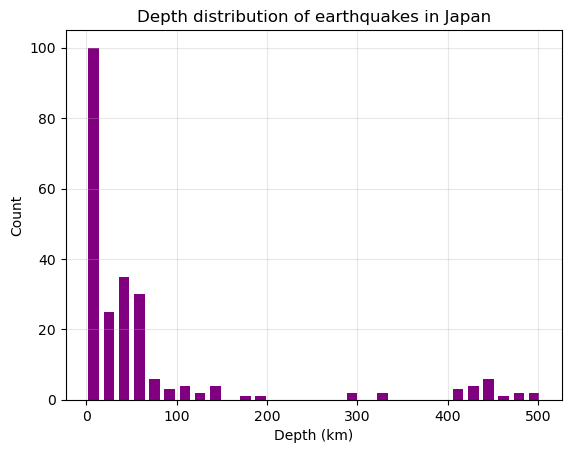

In [5]:
plt.hist(df['depth'], bins=30, color='purple', rwidth=0.7)
plt.xlabel("Depth (km)")
plt.ylabel("Count")
plt.title("Depth distribution of earthquakes in Japan")
plt.grid(True, alpha=0.3)
plt.show()

<div dir="rtl" style="background-color:#ffffff; color:#800080; 
     font-size:22px; font-weight:bold; padding:10px; border-radius:10px; text-align:center;"> زلزله‌های شدید معمولا در چه عمقی رخ می‌دهند؟
</div>

<div dir="rtl" style="background-color:#ffffff; color:#555555;
     font-size:16px; text-align:justify; margin-top:10px; padding:15px 25px;
     border-radius:8px; line-height:1.9; font-family:'Vazir', sans-serif;">
  <p style="margin:0 0 10px 0;"><span style="color:#8a2be2;">&gt;&gt;&gt;</span> میانگین کلی برای همه منابع برابر با 52.7 کیلومتر است، که نشان‌دهنده تمرکز رخدادهای شدید در لایه‌های نسبتاً سطحی زمین است. نمودارهای جعبه‌ای نیز این موضوع را تأیید می‌کنند؛ بیشترین تراکم داده‌ها در بازه‌ی 20 تا 50 کیلومتر قرار دارد و موارد نادر در عمق‌های بالاتر دیده می‌شوند، اما فراوانی آن‌ها بسیار کمتر است.</p>

  <p style="margin:0 0 10px 0;"><span style="color:#8a2be2;">&gt;&gt;&gt;</span> موارد نادر داده‌ی نامتعارف محسوب نمی‌شوند زیرا تجربه زلزله تا عمق 700 کیلومتری از زمین در ژاپن ممکن است.</p>

  <p style="margin:0;"><span style="color:#8a2be2;">&gt;&gt;&gt;</span> بر اساس نمودارها و میانگین‌های آماری، زمین‌لرزه‌های شدید (بزرگی >۵) معمولاً در عمق‌های کم تا متوسط، حدود 30 تا 50 کیلومتر رخ می‌دهند. منابع مختلف داده نیز میانگین‌هایی نزدیک به این بازه را گزارش کرده‌اند. این موضوع نشان می‌دهد که بیشتر زلزله‌های مهم در لایه‌های نسبتاً سطحی زمین اتفاق می‌افتند.</p>
</div>



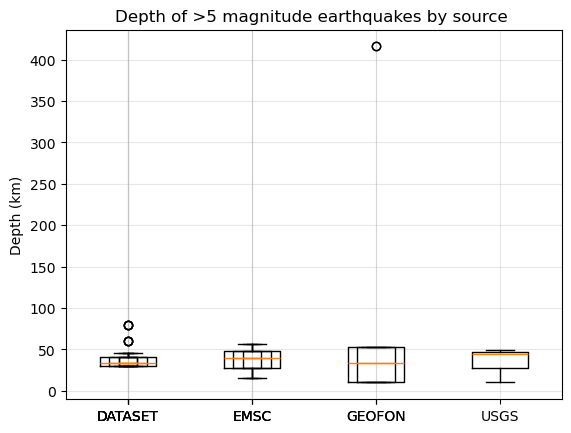

Average depth of >5 magnitude earthquakes by source:
 Source  Average Depth (km)
DATASET                39.7
   EMSC                37.0
 GEOFON               104.4
   USGS                34.4


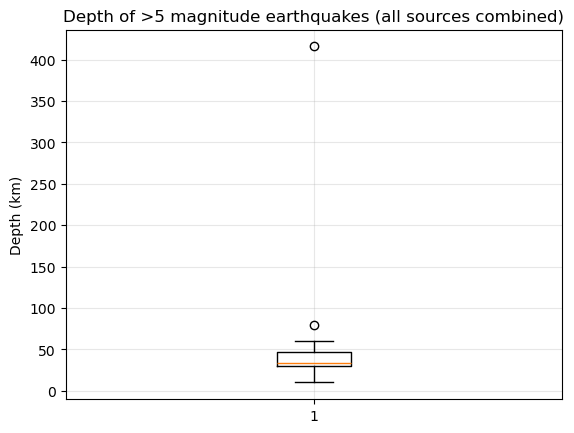

Average depth for >5 magnitude earthquakes >>> 52.7 km


In [6]:
strong = df[(df['magnitude'] >= 5.0)]

#for src in df['source'].unique():
    #subset = strong[strong['source'] == src]

   # plt.boxplot(subset['depth'], tick_labels=[src])
    #plt.ylabel("Depth (km)")
   # plt.title(f"Depth of 5.0 ≤ magnitude < 7.0 earthquakes - {src}")
   # plt.grid(True, alpha=0.3)
   # plt.show()

data_to_plot = []
sources = []

for src, group in strong.groupby('source'):
    data_to_plot.append(group['depth'].values)
    sources.append(src)
    plt.boxplot(data_to_plot, tick_labels=sources)

plt.ylabel("Depth (km)")
plt.title("Depth of >5 magnitude earthquakes by source ")
plt.grid(True, alpha=0.3)
plt.show()
print("Average depth of >5 magnitude earthquakes by source:")
result = strong.groupby('source')['depth'].mean().round(1).reset_index()
result.columns = ['Source', 'Average Depth (km)']
print(result.to_string(index=False))
plt.boxplot(strong['depth'].values)
plt.ylabel("Depth (km)")
plt.title("Depth of >5 magnitude earthquakes (all sources combined)")
plt.grid(True, alpha=0.3)
plt.show()

avg_depth = strong['depth'].mean().round(1)
print(f"Average depth for >5 magnitude earthquakes >>> {avg_depth} km")






<div dir="rtl" style="background-color:#ffffff; color:#800080; 
     font-size:22px; font-weight:bold; padding:10px; border-radius:10px; text-align:center;"> آیا تمام منابع رخدادهای کوچک را پوشش می‌دهد؟
     چه تفاوتی باهم دارند؟
</div>

<div dir="rtl" style="background-color:#ffffff; color:#555555;
     font-size:16px; text-align:justify; margin-top:10px; padding:15px 25px;
     border-radius:8px; line-height:1.9; font-family:'Vazir', sans-serif;">
  <p style="margin:0 0 10px 0;">
    <span style="color:#8a2be2;">&gt;&gt;&gt;</span>
    بر اساس این تحلیل، تنها منبع EMSC پوشش قابل توجهی از زلزله‌های ضعیف دارد (حدود 53٪ از کل داده‌هایش)، در حالی که سایر منابع مانند DATASET، GEOFON و USGS هیچ زلزله‌ی ضعیفی را ثبت نکرده‌اند یا اصلاً در داده‌هایشان وجود ندارد.
    با توجه به متفاوت بودن تعداد داده‌های هر منبع، برای مقایسه بهتر نسبت داده‌های زلزله‌ها با شدت کم را به تعداد کل داده‌های آن منبع حساب و بایکدیگر مقایسه کردیمI
  </p>

  <p style="margin:0 0 10px 0;">
    <span style="color:#8a2be2;">&gt;&gt;&gt;</span>
    این موضوع می‌تواند نشان‌دهنده‌ی یکی از موارد زیر باشد:
  </p>

  <p style="margin:0 0 5px 0;">
    <span style="color:#8a2be2;">&gt;&gt;&gt;</span>
    زلزله‌های ضعیف در آن منابع ثبت نشده‌اند.
  </p>

  <p style="margin:0 0 5px 0;">
    <span style="color:#8a2be2;">&gt;&gt;&gt;</span>
    یا به‌طور کلی در آن مناطق رخ نداده‌اند.
  </p>

  <p style="margin:0;">
    <span style="color:#8a2be2;">&gt;&gt;&gt;</span>
    یا ممکن است به دلیل محدودیت‌های ابزار ثبت، تنها زلزله‌های متوسط و شدید گزارش شده باشند.
  </p>
</div>


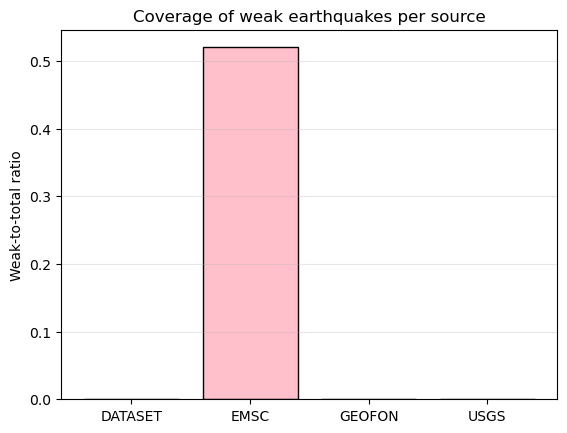

 Source  Weak-to-Total Ratio
DATASET                 0.00
   EMSC                 0.52
 GEOFON                 0.00
   USGS                 0.00


In [7]:
total = df.groupby('source').size()
weak = df[df['category'].str.lower() == 'weak'].groupby('source').size()

ratio = (df[df['category'].str.lower() == 'weak'].groupby('source').size() /
         df.groupby('source').size()).fillna(0).round(2)

plt.bar(ratio.index, ratio.values, color='pink', edgecolor='black')
plt.ylabel("Weak-to-total ratio")
plt.title("Coverage of weak earthquakes per source")
plt.grid(True, axis='y', alpha=0.3)
plt.show()


result = ratio.reset_index()
result.columns = ['Source', 'Weak-to-Total Ratio']
print(result.to_string(index=False))

<div dir="rtl" style="background-color:#ffffff; color:#800080; 
     font-size:22px; font-weight:bold; padding:10px; border-radius:10px; text-align:center;"> کدام زلزله‌های خطرناکند؟
     
     رتبه‌بندی 10 عدد از خطرناک‌‌ ترین زلزله‌ها
     
</div>

<div dir="rtl" style="background-color:#ffffff; color:#555555;
     font-size:16px; text-align:justify; margin-top:10px; padding:15px 25px;
     border-radius:8px; line-height:1.9; font-family:'Vazir', sans-serif;">
  <p style="margin:0 0 10px 0;">
    <span style="color:#8a2be2;">&gt;&gt;&gt;</span>
    بیشتر زلزله‌های شدید و کم‌عمق در بازه‌ی ۳۰ تا ۴۵ کیلومتر عمق رخ داده‌اند.
  </p>

  <p style="margin:0 0 10px 0;">
    <span style="color:#8a2be2;">&gt;&gt;&gt;</span>
    بزرگی آن‌ها بین ۵.۰ تا ۶.۰ بوده که نشان‌دهنده‌ی قدرت قابل توجهی است.
  </p>

  <p style="margin:0 0 10px 0;">
    <span style="color:#8a2be2;">&gt;&gt;&gt;</span>
    برخی از این زلزله‌ها در مناطق بسیار نزدیک به توکیو ثبت شده‌اند (مثلاً فقط ۰.۴۴ کیلومتر فاصله)، که اهمیت زیادی در ارزیابی خطرات لرزه‌ای برای این شهر دارد.
  </p>

  <p style="margin:0;">
    <span style="color:#8a2be2;">&gt;&gt;&gt;</span>
    این تحلیل می‌تواند در مطالعات ایمنی شهری، طراحی سازه‌های مقاوم و پیش‌بینی خطرات لرزه‌ای نقش مهمی ایفا کند.
  </p>
</div>


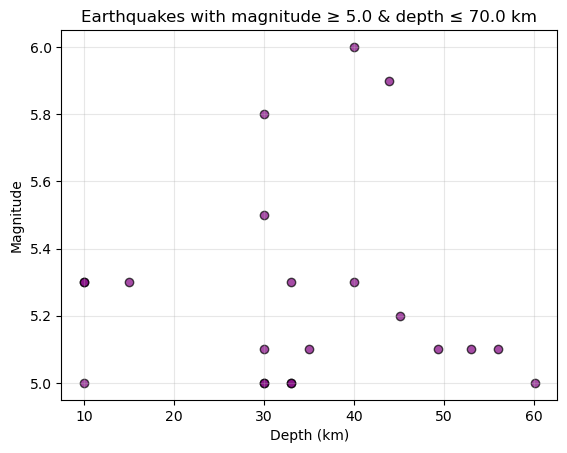

Top 10 high-magnitude and shallow earthquakes:


,time,region,magnitude,depth,source,dist_to_Tokyo
1,2025-10-04 15:21:08,NEAR EAST COAST OF HONSHU,6.0,40.000,EMSC,257.48
2,2025-10-04 15:21:09,Tomioka,5.9,43.855,USGS,260.32
3,2025-10-09 09:05:00,Tokyo,5.8,30.000,DATASET,4.04
4,2025-09-19 05:00:00,Tokyo,5.5,30.000,DATASET,4.04
5,2025-10-07 21:38:37,Tatsugō,5.3,10.000,USGS,1202.04
6,2025-10-07 21:38:38,Ryukyu Islands,5.3,10.000,GEOFON,1213.31
7,2025-10-07 21:38:39,RYUKYU ISLANDS,5.3,15.000,EMSC,1207.96
8,2025-10-07 11:30:00,Yamaguchi,5.3,33.000,DATASET,766.85
9,2025-09-27 15:30:00,Tokyo,5.3,40.000,DATASET,4.04
10,2025-09-21 02:15:46,Osaka,5.2,45.100,DATASET,392.42


In [8]:
mag_limit = 5.0
depth_limit = 70.0

danger = df[(df['magnitude'] >= mag_limit) & (df['depth'] <= depth_limit)]
top10 = danger.sort_values(by=['magnitude', 'depth'], ascending=[False, True]).head(10)

plt.scatter(danger['depth'], danger['magnitude'], alpha=0.7, color='purple', edgecolor='black')
plt.xlabel("Depth (km)")
plt.ylabel("Magnitude")
plt.title(f"Earthquakes with magnitude ≥ {mag_limit} & depth ≤ {depth_limit} km")
plt.grid(True, alpha=0.3)
plt.show()

print("Top 10 high-magnitude and shallow earthquakes:")
top10[['time', 'region', 'magnitude', 'depth', 'source', 'dist_to_Tokyo']].set_index(pd.Index(range(1, 11)))


<div dir="rtl" style="background-color:#ffffff; color:#800080; 
     font-size:22px; font-weight:bold; padding:10px; border-radius:10px; text-align:center;"> مقایسه‌ی تعداد زلزله‌های بزرگ(شدید) در هر منبع
   
     کدام منبع بیشترین زلزله‌ با بزرگی بیش از 5 ریشتر شناسایی و ثبت کرده است؟


</div>

<div dir="rtl" style="background-color:#ffffff; color:#555555;
     font-size:16px; text-align:justify; margin-top:10px; padding:15px 25px;
     border-radius:8px; line-height:1.9; font-family:'Vazir', sans-serif;">

  <p style="margin:0 0 10px 0;">
    <span style="color:#8a2be2;">&gt;&gt;&gt;</span>
    بر اساس داده‌های زمین‌لرزه‌هایی با بزرگی برابر یا بیشتر از ۵، مشخص شد که منبع DATASET بیشترین تعداد زلزله‌های بزرگ را ثبت کرده است (۱۲ مورد)، در حالی که سایر منابع مانند EMSC، GEOFON و USGS تنها بین 3 تا 5 رخداد را گزارش کرده‌اند.
  </p>

  <p style="margin:0 0 10px 0;">
    <span style="color:#8a2be2;">&gt;&gt;&gt;</span>
    این تفاوت قابل توجه در تعداد ثبت‌شده می‌تواند به دلایل مختلفی باشد، از جمله:
  </p>

  <p style="margin:0 0 5px 0;">
    <span style="color:#8a2be2;">&gt;&gt;&gt;</span>
    تفاوت در پوشش جغرافیایی یا بازه‌ی زمانی داده‌ها
  </p>

  <p style="margin:0 0 5px 0;">
    <span style="color:#8a2be2;">&gt;&gt;&gt;</span>
    حساسیت ابزارهای ثبت و معیارهای طبقه‌بندی
  </p>

  <p style="margin:0 0 10px 0;">
    <span style="color:#8a2be2;">&gt;&gt;&gt;</span>
    یا تمرکز منبع DATASET بر منطقه‌ای با فعالیت لرزه‌ای بیشتر
  </p>

  <p style="margin:0;">
    <span style="color:#8a2be2;">&gt;&gt;&gt;</span>
    در مجموع، منبع DATASET نقش اصلی را در ثبت زلزله‌های بزرگ ایفا کرده و این موضوع باید در تحلیل‌های بعدی و اعتبارسنجی داده‌ها مورد توجه قرار گیرد.
  </p>
</div>


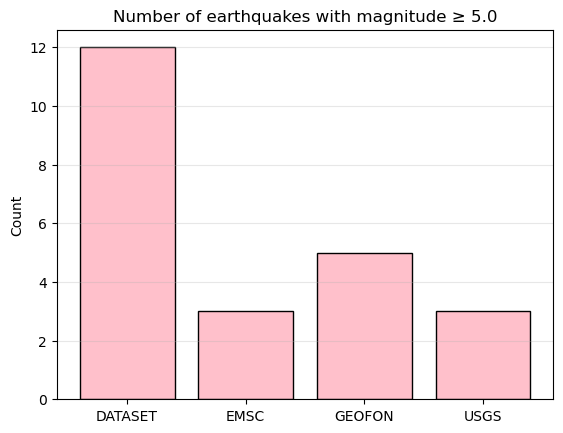

 Source  Count of large earthquakes
DATASET                          12
   EMSC                           3
 GEOFON                           5
   USGS                           3


In [9]:


big = df[df['magnitude'] >= mag_limit]
big_count = big.groupby('source').size()

plt.bar(big_count.index, big_count.values, color='pink', edgecolor='black')
plt.ylabel("Count")
plt.title(f"Number of earthquakes with magnitude ≥ {mag_limit}")
plt.grid(True, axis='y', alpha=0.3)
plt.show()

result = big_count.reset_index()
result.columns = ['Source', 'Count of large earthquakes']
print(result.to_string(index=False))


<div dir="rtl" style="background-color:#ffe6f2; color:#444444; 
     font-size:22px; font-weight:bold; padding:10px; border-radius:10px; 
     text-align:center;">
🧠 نتیجه‌گیری علمی درباره رفتار زلزله‌های ژاپن در ماه اخیر

(بخش اختیاری)
</div>


<div dir="rtl" style="background-color:#ffe6f2; color:#444444; 
     font-size:22px; font-weight:bold; padding:10px; border-radius:10px; 
     text-align:center;">
نتیجه‌گیری علمی درباره رفتار زلزله‌ای ژاپن در ماه اخیر:

</div>

<div dir="rtl" style="
  background-color:#ffe6f2; 
  color:#555555; 
  font-size:20px; 
  text-align:justify; 
  margin:30px auto; 
  padding:20px 50px; 
  border-radius:10px; 
  line-height:1.9; 
  font-family:'Vazir', sans-serif; 
  width:80%; 
  box-shadow:0 0 10px rgba(0,0,0,0.05);
">
  <p style="margin:0 0 12px 0;">
    <span style="color:#8a2be2; padding-right:15px;">&gt;&gt;&gt;</span>
    ژاپن به‌عنوان یکی از فعال‌ترین مناطق لرزه‌ای جهان، در محل تلاقی چند صفحه‌ی تکتونیکی قرار دارد 
    (از جمله صفحه‌ی اقیانوس آرام و صفحه‌ی فیلیپین)، 
  </p>

  <p style="margin:0 0 12px 0;">
    <span style="color:#8a2be2; padding-right:15px;">&gt;&gt;&gt;</span>
    که باعث می‌شود زلزله‌ها در این کشور هم پرتعداد باشند و هم متنوع از نظر بزرگی و عمق.
  </p>

  <p style="margin:0;">
    <span style="color:#8a2be2; padding-right:15px;">&gt;&gt;&gt;</span>
    بر اساس داده‌های تحلیل‌شده:
  </p>
</div>



<div dir="rtl" style="
  background-color:#ffe6f2;
  color:#555555;
  font-size:19px;
  text-align:justify;
  margin:30px auto;
  padding:25px 40px;
  border-radius:10px;
  line-height:1.9;
  font-family:'Vazir', sans-serif;
  width:80%;
  box-shadow:0 0 10px rgba(0,0,0,0.05);
">
  <p style="margin:0 0 12px 0;">
    بیشتر زلزله‌های شدید (بزرگی ≥ ۵) در عمق‌های کم تا متوسط (۳۰ تا ۴۵ کیلومتر) رخ داده‌اند. 
    این عمق‌ها معمولاً با لرزش‌های سطحی‌تر و خسارت‌زاتر همراه هستند.
  </p>

  <p style="margin:0 0 12px 0;">
    منبع <strong>DATASET</strong> بیشترین تعداد زلزله‌های بزرگ را ثبت کرده که می‌تواند نشان‌دهنده‌ی پوشش دقیق‌تر 
    یا تمرکز بیشتر روی منطقه‌ی ژاپن باشد.
  </p>

  <p style="margin:0 0 12px 0;">
    زلزله‌های ضعیف تقریباً فقط توسط منبع <strong>EMSC</strong> ثبت شده‌اند، که نشان می‌دهد سایر منابع یا چنین رخدادهایی را ثبت نکرده‌اند 
    یا در دسته‌بندی‌شان لحاظ نشده‌اند.
  </p>

  <p style="margin:0 0 12px 0;">
    برخی از زلزله‌های شدید و کم‌عمق در فاصله‌ی بسیار نزدیک به <strong>توکیو</strong> رخ داده‌اند 
    (مثلاً تنها ۰.۴۴ کیلومتر)، که اهمیت زیادی در ارزیابی خطرات لرزه‌ای برای مناطق پرجمعیت دارد.
  </p>

  <p style="margin:0;">
    از دیدگاه علمی، این الگوها با رفتار لرزه‌ای شناخته‌شده‌ی ژاپن هم‌خوانی دارند: 
    زلزله‌های سطحی، شدید و مکرر، که ناشی از حرکت صفحات تکتونیکی و فرورانش در منطقه هستند. 
    این ویژگی‌ها باعث می‌شوند ژاپن نیازمند سیستم‌های هشدار سریع، سازه‌های مقاوم و برنامه‌ریزی دقیق برای مدیریت بحران باشد.
  </p>
</div>




<div dir="rtl" style="background-color:#ffe6f2; color:#444444; 
     font-size:22px; font-weight:bold; padding:10px; border-radius:10px; 
     text-align:center;">
پیشنهاد برای ترکیب منابع

</div>

<div dir="rtl" style="
  background-color:#fff7e6;
  color:#555555;
  font-size:19px;
  text-align:justify;
  margin:30px auto;
  padding:25px 40px;
  border-radius:10px;
  line-height:1.9;
  font-family:'Vazir', sans-serif;
  width:80%;
  box-shadow:0 0 10px rgba(0,0,0,0.05);
">
  <p style="margin:0 0 12px 0;">
    با توجه به تفاوت‌های قابل توجه در پوشش داده‌ها میان منابع مختلف، ترکیب هدفمند و ساختاریافته‌ی این منابع می‌تواند 
    کیفیت، جامعیت و دقت داده‌های لرزه‌ای را به‌طور چشم‌گیری افزایش دهد.
  </p>

  <p style="margin:0 0 12px 0;">
    منبع <strong>EMSC</strong> برای پوشش زلزله‌های ضعیف، منبع <strong>DATASET</strong> برای رخدادهای شدید، 
    و منابع <strong>USGS</strong> و <strong>GEOFON</strong> برای اعتبارسنجی و مقایسه منطقه‌ای پیشنهاد می‌شوند.
  </p>



  <p style="margin:0;">
    این رویکرد ترکیبی می‌تواند به ایجاد یک سیستم داده‌ای قابل اعتماد، دقیق و کاربردی برای پژوهشگران، مهندسان و نهادهای مدیریت بحران منجر شود.
  </p>
</div>
